In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from util import util
from BD.sqlite import BD
from Problem.SCP.problem import SCP

In [2]:
# def iterarAnaconda(iter, columns, poblacion, Best): # elimine maxIter

iter=10
columns=15
pop=200

instance = SCP('scp41')

poblacion = np.random.randint(low=0, high=2, size = (pop, instance.getColumns()))

N = len(poblacion)
m = columns
lb = 0
ub = m # cambie limiter superior de 1 a 2

r = np.random.uniform(0, 1, (N, m))
I = np.random.choice([1, 2], (N, m))

Chequeo de cobertura: 1


In [3]:
# Genero un vector donde almacenaré los fitness de cada individuo
fitness = np.zeros(pop)

# Genero un vetor dedonde tendré mis soluciones rankeadas
solutionsRanking = np.zeros(pop)

# calculo de factibilidad de cada individuo y calculo del fitness inicial
for i in range(poblacion.__len__()):
    flag, aux = instance.factibilityTest(poblacion[i])
           

    fitness[i] = instance.fitness(poblacion[i])
    
solutionsRanking = np.argsort(fitness) # rankings de los mejores fitnes
bestRowAux = solutionsRanking[0]
# DETERMINO MI MEJOR SOLUCION Y LA GUARDO 
Best = poblacion[bestRowAux].copy()
BestFitness = fitness[bestRowAux]

# PARA MFO
BestFitnessArray = fitness[solutionsRanking] 
bestSolutions = poblacion[solutionsRanking]

In [11]:
len(PC_i)

200

In [12]:
len(CFF_i)

200

In [13]:
PC_i_j

-0.0

In [169]:

import warnings

warnings.simplefilter("ignore", RuntimeWarning)

import numpy as np
import random


import numpy as np

N = len(poblacion)
m = columns
lb = 0
ub = 1

r = np.random.uniform(0, 1, (N, m))
I = np.random.choice([1, 2], (N, m))

CFL_i = bestSolutions
CFF_i = BestFitnessArray
CFF_i_max =  max(CFF_i) 


for i in range(N):
    
    PC_i=[]
    C_i=[]
    C_i.append(0)
    
    for j in range(0,len(CFF_i)):
        
        deno=0

        for n in range(0,j):
            deno= deno+(CFF_i[n] - CFF_i_max) # denominador

        if deno == 0:
            PC_i_j=0
            PC_i.append(PC_i_j)
        else:
            PC_i_j = (CFF_i[j] - CFF_i_max) / deno
            PC_i.append(PC_i_j)

        if j==0:
            C_i_j= PC_i[j] + 0
            C_i.append(C_i_j)
        else:
            C_i_j= PC_i[j] + C_i[j-1]
            C_i.append(C_i_j)



In [175]:
PC_i[1]- C_i[0]


0.8672354948805461

In [40]:
i=0
# poblacion[i] + 
I*poblacion[i]
# r[i] * (SF_i - I[i] * poblacion[i])
# SF_i

ValueError: operands could not be broadcast together with shapes (200,15) (1000,) 

In [3]:
import sqlite3

con = sqlite3.connect("./BD/resultados_scp.db")

In [4]:
instancia='scp63'

In [35]:
dirResultado = './Resultados/'
archivoResumenFitness = open(f'{dirResultado}resumen_fitness_SCP.csv', 'w')
archivoResumenTimes = open(f'{dirResultado}resumen_times_SCP.csv', 'w')
archivoResumenPercentage = open(f'{dirResultado}resumen_percentage_SCP.csv', 'w')

archivoResumenFitness.write("instance,best,avg. fitness, std fitness,best,avg. fitness, std fitness,best,avg. fitness, std fitness, best,avg. fitness, std fitness\n")
archivoResumenTimes.write("instance, min time (s), avg. time (s), std time (s), min time (s), avg. time (s), std time (s), min time (s), avg. time (s), std time (s), min time (s), avg. time (s), std time (s)\n")
archivoResumenPercentage.write("instance, avg. XPL%, avg. XPT%, avg. XPL%, avg. XPT%, avg. XPL%, avg. XPT%, avg. XPL%, avg. XPT%\n")

graficos = True

bd = BD()
res = con.execute("select DISTINCT id_instancia, nombre from instancias i where nombre in ('scp41')")
instancias = res.fetchall()

In [36]:
instancias

[(5484, 'scp41')]

In [6]:
instancias=bd.obtenerInstancias(f'"{instancia}"')

In [24]:
id=instancias[0][0]

res = con.execute(f"SELECT * FROM instancias where id_instancia = {id}")
resultados = res.fetchall()

# Obtén los nombres de las columnas del cursor
nombres_columnas = [column[0] for column in res.description]

# print("Nombres de las columnas:", nombres_columnas)

# Ahora puedes imprimir los resultados junto con los nombres de las columnas
for fila in resultados:
    for columna, valor in zip(nombres_columnas, fila):
        print(f"{columna}: {valor}")

id_instancia: 5397
tipo_problema: BEN
nombre: F1
optimo: 0.0
param: lb:-100,ub:100,dim:30


In [8]:
inst = instancias[0][1]
# mh = 'GAO'

In [9]:
inst

'scp63'

In [10]:
res=con.execute(f''' 
    select i.nombre, i.archivo 
    from experimentos e 
    inner join iteraciones i on e.id_experimento  = i.fk_id_experimento 
    inner join instancias i2 on e.fk_id_instancia = i2.id_instancia 
    where i2.nombre  = '{inst}' 
    order by i2.nombre desc , e.MH desc   
    ''')
        
data = res.fetchall()

In [11]:
data

[('GWO_scp63',
  b'iter,fitness,time,XPL,XPT,DIV\r\n0,23163.0,0.051,100.0,0.0,0.484\r\n1,9656.0,0.358,45.87,54.13,0.222\r\n2,3611.0,0.316,19.21,80.79,0.093\r\n3,1250.0,0.335,9.71,90.29,0.047\r\n4,438.0,0.328,4.96,95.04,0.024\r\n5,175.0,0.335,1.65,98.35,0.008\r\n6,162.0,0.328,1.45,98.55,0.007\r\n7,160.0,0.335,1.24,98.76,0.006\r\n8,160.0,0.338,1.24,98.76,0.006\r\n9,160.0,0.336,1.24,98.76,0.006\r\n10,160.0,0.34,1.24,98.76,0.006\r\n11,160.0,0.345,1.03,98.97,0.005\r\n12,160.0,0.341,1.45,98.55,0.007\r\n13,160.0,0.346,1.24,98.76,0.006\r\n14,160.0,0.347,1.03,98.97,0.005\r\n15,160.0,0.353,1.24,98.76,0.006\r\n16,160.0,0.361,1.24,98.76,0.006\r\n17,160.0,0.35,1.24,98.76,0.006\r\n18,160.0,0.349,1.24,98.76,0.006\r\n19,160.0,0.351,1.24,98.76,0.006\r\n20,160.0,0.367,1.24,98.76,0.006\r\n21,160.0,0.36,1.24,98.76,0.006\r\n22,160.0,0.352,1.24,98.76,0.006\r\n23,160.0,0.356,1.03,98.97,0.005\r\n24,160.0,0.352,1.03,98.97,0.005\r\n25,160.0,0.364,1.24,98.76,0.006\r\n26,160.0,0.372,1.24,98.76,0.006\r\n27,160.0,0

In [12]:
blob[0][0]

NameError: name 'blob' is not defined

(5278, 'scp63')
Grafico de exploracion y explotacion realizado para GWO, problema: scp63, corrida: 1 
------------------------------------------------------------------------------------------------------------


ValueError: x and y must have same first dimension, but have shapes (51,) and (0,)

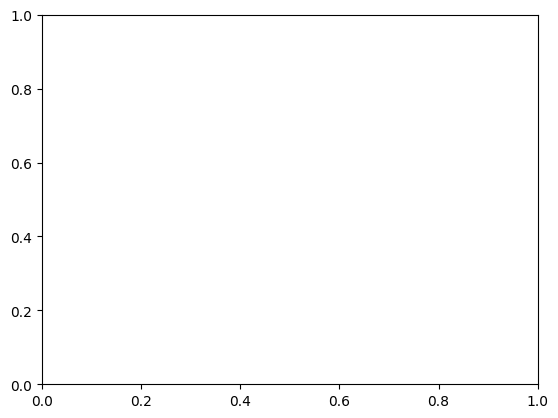

In [14]:
for instancia in instancias:
    print(instancia)
    
    res=con.execute(f''' 
    select i.nombre, i.archivo 
    from experimentos e 
    inner join iteraciones i on e.id_experimento  = i.fk_id_experimento 
    inner join instancias i2 on e.fk_id_instancia = i2.id_instancia 
    where i2.nombre  = '{inst}' 
    order by i2.nombre desc , e.MH desc   
    ''')
        
    blob = res.fetchall()
    # blob = bd.obtenerArchivos(instancia[0])
    corrida = 1
    
    archivoFitness = open(f'{dirResultado}fitness.csv', 'w')
    archivoFitness.write('MH,FITNESS\n')

    fitnessSCA = [] 
    fitnessGWO = [] 
    fitnessGAO = [] 
    fitnessPSA = []

    timeSCA = []
    timeGWO = []
    timeGAO = []
    timePSA = []

    xplSCA = [] 
    xplGWO = [] 
    xplGAO = [] 
    xplPSA = []

    xptSCA = []
    xptGWO = []
    xptGAO = []
    xptPSA = []
    
    bestFitnessSCA = []
    bestFitnessGWO = []
    bestFitnessGAO = []
    bestFitnessPSA = []

    bestTimeSCA = []
    bestTimeGWO = []
    bestTimeGAO = []
    bestTimePSA = []
    
    for d in blob:
        
        nombreArchivo = d[0]
        archivo = d[1]
        
        if isinstance(archivo, str):
            archivo = archivo.encode('utf-8')

        direccionDestiono = './Resultados/Transitorio/'+nombreArchivo+'.csv'
        # print("-------------------------------------------------------------------------------")
        util.writeTofile(archivo,direccionDestiono)
        
        data = pd.read_csv(direccionDestiono)
        
        mh = nombreArchivo.split('_')[0]
        problem = nombreArchivo.split('_')[1]

        iteraciones = data['iter']
        fitness     = data['fitness']
        time        = data['time']
        xpl         = data['XPL']
        xpt         = data['XPT']
        
        if mh == 'PSA':
            fitnessPSA.append(np.min(fitness))
            timePSA.append(np.round(np.sum(time),3))
            xplPSA.append(np.round(np.mean(xpl), decimals=2))
            xptPSA.append(np.round(np.mean(xpt), decimals=2))
            archivoFitness.write(f'PSA,{str(np.min(fitness))}\n')
        if mh == 'SCA':
            fitnessSCA.append(np.min(fitness))
            timeSCA.append(np.round(np.sum(time),3))
            xplSCA.append(np.round(np.mean(xpl), decimals=2))
            xptSCA.append(np.round(np.mean(xpt), decimals=2))
            archivoFitness.write(f'SCA,{str(np.min(fitness))}\n')
        if mh == 'GWO':
            fitnessGWO.append(np.min(fitness))
            timeGWO.append(np.round(np.sum(time),3))
            xplGWO.append(np.round(np.mean(xpl), decimals=2))
            xptGWO.append(np.round(np.mean(xpt), decimals=2))
            archivoFitness.write(f'GWO,{str(np.min(fitness))}\n')

        if mh == 'GAO':
            fitnessGAO.append(np.min(fitness))
            timeGAO.append(np.round(np.sum(time),3))
            xplGAO.append(np.round(np.mean(xpl), decimals=2))
            xptGAO.append(np.round(np.mean(xpt), decimals=2))
            archivoFitness.write(f'GAO,{str(np.min(fitness))}\n')
            print('GAO')
            
        if graficos:

            # fig , ax = plt.subplots()
            # ax.plot(iteraciones,fitness)
            # ax.set_title(f'Convergence {mh} \n {problem} run {corrida}')
            # ax.set_ylabel("Fitness")
            # ax.set_xlabel("Iteration")
            # plt.savefig(f'{dirResultado}/Graficos/Coverange_{mh}_{problem}_{corrida}.pdf')
            # plt.close('all')
            # print(f'Grafico de covergencia realizado {mh} {problem} ')
            
            figPER, axPER = plt.subplots()
            axPER.plot(iteraciones, xpl, color="r", label=r"$\overline{XPL}$"+": "+str(np.round(np.mean(xpl), decimals=2))+"%")
            axPER.plot(iteraciones, xpt, color="b", label=r"$\overline{XPT}$"+": "+str(np.round(np.mean(xpt), decimals=2))+"%")
            axPER.set_title(f'XPL% - XPT% {mh} \n {problem} run {corrida}')
            axPER.set_ylabel("Percentage")
            axPER.set_xlabel("Iteration")
            axPER.legend(loc = 'upper right')
            plt.savefig(f'{dirResultado}Graficos/Percentage_{mh}_{problem}_{corrida}.pdf')
            plt.close('all')
            print(f'Grafico de exploracion y explotacion realizado para {mh}, problema: {problem}, corrida: {corrida} ')
        
        corrida +=1
        
        if corrida == 32:
            corrida = 1
        
        os.remove('./Resultados/Transitorio/'+nombreArchivo+'.csv')
        
    #archivoResumenFitness.write(f'''{problem},{np.min(fitnessGWO)},{np.round(np.average(fitnessGWO),3)},{np.round(np.std(fitnessGWO),3)},{np.min(fitnessPSA)},{np.round(np.average(fitnessPSA),3)},{np.round(np.std(fitnessPSA),3)},{np.min(fitnessSCA)},{np.round(np.average(fitnessSCA),3)},{np.round(np.std(fitnessSCA),3)},{np.min(fitnessGAO)},{np.round(np.average(fitnessGAO),3)},{np.round(np.std(fitnessGAO),3)} \n''')
    #archivoResumenTimes.write(f'''{problem},{np.min(timeGWO)},{np.round(np.average(timeGWO),3)},{np.round(np.std(timeGWO),3)},{np.min(timePSA)},{np.round(np.average(timePSA),3)},{np.round(np.std(timePSA),3)},{np.min(timeSCA)},{np.round(np.average(timeSCA),3)},{np.round(np.std(timeSCA),3)},{np.min(timeGAO)},{np.round(np.average(timeGAO),3)},{np.round(np.std(timeGAO),3)} \n''')
    #archivoResumenPercentage.write(f'''{problem},{np.round(np.average(xplGWO),3)},{np.round(np.average(xptGWO),3)},{np.round(np.average(xplPSA),3)},{np.round(np.average(xptPSA),3)},{np.round(np.average(xplSCA),3)},{np.round(np.average(xptSCA),3)},{np.round(np.average(xplGAO),3)},{np.round(np.average(xptGAO),3)} \n''')

    archivoResumenFitness.write(f'''{problem},{np.min(fitnessGAO)},{np.round(np.average(fitnessGAO),3)},{np.round(np.std(fitnessGAO),3)} \n''')
    archivoResumenTimes.write(f'''{problem},{np.min(timeGAO)},{np.round(np.average(timeGAO),3)},{np.round(np.std(timeGAO),3)} \n''')
    archivoResumenPercentage.write(f'''{problem},{np.round(np.average(xplGAO),3)},{np.round(np.average(xptGAO),3)} \n''')


    res = con.execute(f'''             
            select e.id_experimento , e.MH , E.ML, i2.nombre  , i.nombre , i.archivo , MIN(r.fitness)  
            from resultados r 
            inner join experimentos e on r.fk_id_experimento = e.id_experimento
            inner join iteraciones i on i.fk_id_experimento = e.id_experimento
            inner join instancias i2 on e.fk_id_instancia = i2.id_instancia 
            where i2.nombre  = '{inst}' and e.ML = ''
            group by e.MH , i2.nombre
                       
        ''')
        
    blob2 = res.fetchall()

    # blob = bd.obtenerMejoresArchivos(instancia[0])
    
    for d in blob2:

        nombreArchivo = d[4]
        archivo = d[5]

        if isinstance(archivo, str):
            archivo = archivo.encode('utf-8')

        direccionDestiono = f'./Resultados/Transitorio/'+nombreArchivo+'.csv'
        util.writeTofile(archivo,direccionDestiono)
        
        data = pd.read_csv(direccionDestiono)
        
        mh = nombreArchivo.split('_')[0]
        problem = nombreArchivo.split('_')[1]

        iteraciones = data['iter']
        fitness     = data['fitness']
        time        = data['time']
        xpl         = data['XPL']
        xpt         = data['XPT']
        
        if mh == 'PSA':
            bestFitnessPSA      = fitness
            bestTimePSA         = time
        if mh == 'SCA':
            bestFitnessSCA      = fitness
            bestTimeSCA         = time
        if mh == 'GWO':
            bestFitnessGWO      = fitness
            bestTimeGWO         = time
        if mh == 'GAO':
            bestFitnessGAO      = fitness
            bestTimeGAO         = time
        
        os.remove('./Resultados/Transitorio/'+nombreArchivo+'.csv')

    print("------------------------------------------------------------------------------------------------------------")
    figPER, axPER = plt.subplots()
    # axPER.plot(iteraciones, bestFitnessGWO, color="r", label="GWO")
    # axPER.plot(iteraciones, bestFitnessSCA, color="b", label="SCA")
    # axPER.plot(iteraciones, bestFitnessPSA, color="g", label="PSA")
    axPER.plot(iteraciones, bestFitnessGAO, color="b", label="GAO")
    axPER.set_title(f'Coverage \n {problem}')
    axPER.set_ylabel("Fitness")
    axPER.set_xlabel("Iteration")
    axPER.legend(loc = 'upper right')
    plt.savefig(f'{dirResultado}Best/fitness_{problem}.pdf')
    plt.close('all')
    print(f'Grafico de fitness realizado {problem} ')
    
    figPER, axPER = plt.subplots()
    # axPER.plot(iteraciones, bestTimeGWO, color="r", label="GWO")
    # axPER.plot(iteraciones, bestTimeSCA, color="b", label="SCA")
    # axPER.plot(iteraciones, bestTimePSA, color="g", label="PSA")
    axPER.plot(iteraciones, bestTimeGAO, color="b", label="GAO")
    axPER.set_title(f'Time (s) \n {problem}')
    axPER.set_ylabel("Time (s)")
    axPER.set_xlabel("Iteration")
    axPER.legend(loc = 'lower right')
    plt.savefig(f'{dirResultado}Best/time_{problem}.pdf')
    plt.close('all')
    print(f'Grafico de time realizado {problem} ')
    
    
    archivoFitness.close()
    
    print("------------------------------------------------------------------------------------------------------------")
    # ---------------------------------------------------------------------------------------------------------------------------------------------------------------
    datos = pd.read_csv(dirResultado+'fitness.csv')
    figFitness, axFitness = plt.subplots()
    axFitness = sns.boxplot(x='MH', y='FITNESS', data=datos)
    axFitness.set_title(f'Fitness \n{instancia[0]}', loc="center", fontdict={'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
    axFitness.set_ylabel("Fitness")
    axFitness.set_xlabel("Metaheuristics")
    figFitness.savefig(dirResultado+'boxplot/boxplot_fitness.pdf')
    plt.close('all')
    print(f'Grafico de boxplot con fitness para la instancia {instancia[0]} realizado con exito')
    
    figFitness, axFitness = plt.subplots()
    axFitness = sns.violinplot(x='MH', y='FITNESS', data=datos, gridsize=50)
    axFitness.set_title(f'Fitness \n{instancia[0]}', loc="center", fontdict={'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
    axFitness.set_ylabel("Fitness")
    axFitness.set_xlabel("Metaheuristics")
    figFitness.savefig(dirResultado+'violinplot/violinplot_fitness.pdf')
    plt.close('all')
    print(f'Grafico de violines con fitness para la instancia {instancia[0]} realizado con exito')
    
    os.remove(dirResultado+'fitness.csv')
    
    print("------------------------------------------------------------------------------------------------------------")

# archivoResumenFitness.close()
# archivoResumenTimes.close()
# archivoResumenPercentage.close()
        

In [41]:
nombreArchivo

'GWO_scp63'